<a href="https://colab.research.google.com/github/VenkatRamana125/ML-Projects/blob/main/Fake_And_Real_News_Detection_Using_Keras_and_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload= files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
upload= files.upload()

Saving test.csv to test.csv


In [ ]:
# import the essential libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [ ]:
# exploring the dataset

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
train.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
train.shape

(20800, 5)

In [ ]:
test.shape

(5200, 4)

In [ ]:
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
data = train.append(test, ignore_index=True)

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0


In [ ]:
len(data['title'][2])

33

In [ ]:
data['text'][58]

'If Donald Trump Wins The Election, It Will Be The Biggest Miracle In US Political History Posted on Home » Headlines » World News » If Donald Trump Wins The Election, It Will Be The Biggest Miracle In US Political History \nAre we about to see the largest election day miracle of all time? \n\nFrom Michael Snyder : \nBecause as I will show in this article, that is precisely what it is going to take in order for Donald Trump to win. Before I go any further, I want to make it exceedingly clear that I am not saying what the outcome will be on November 8th. As I recently told a national television audience, I do not know who is going to win. \nIn this article I am simply going to examine the poll numbers and the electoral map as they currently stand. But in this bizarre election things can literally change overnight, and it is entirely possible that we could still have another “October surprise” or two before it is all said and done. And without a doubt Donald Trump desperately needs somet

In [ ]:
data.isnull().sum()

id           0
title      680
author    2460
text        46
label     5200
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
# Building Wordcloud

all_words = ' '.join([i for i in data["text"]])
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, max_font_size=150).generate(all_words)

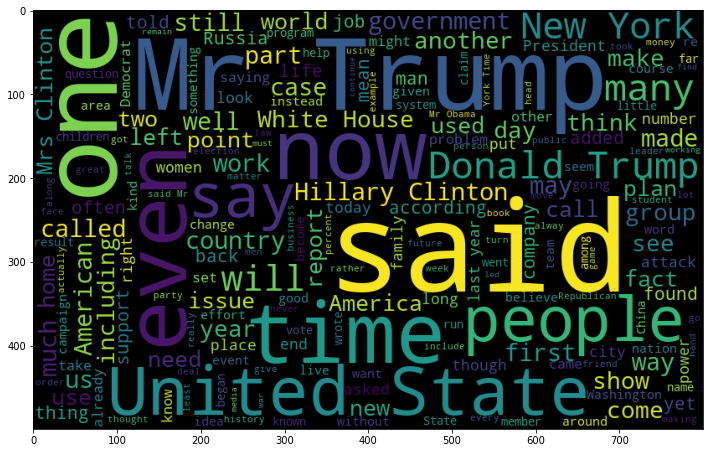

In [ ]:
plt.figure(figsize = (12, 9))
plt.imshow(wordcloud)

In [ ]:
# Wordcloud for Unreliable News

unreliable_words = ' '.join([i for i in data["text"][data['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size=150).generate(unreliable_words)

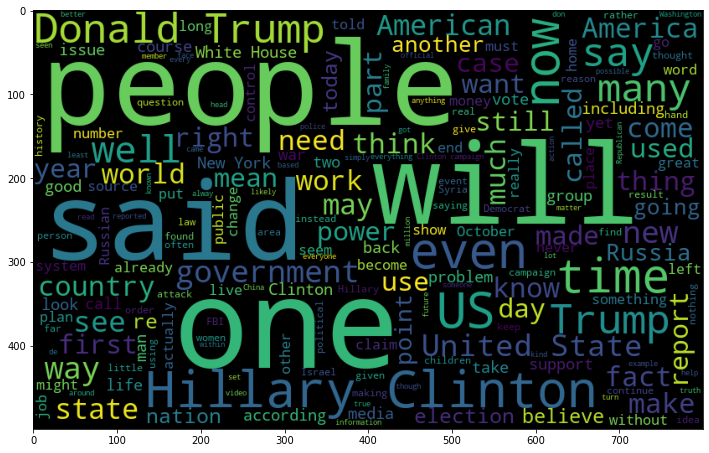

In [ ]:
plt.figure(figsize = (12, 9))
plt.imshow(wordcloud)

In [ ]:
# Preprocessing

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
X = data.drop('label',axis=1)
y= data['label']

In [ ]:
msg = X.copy()

In [ ]:
msg.reset_index(inplace=True)

In [ ]:
news = []

for i in range(0, len(msg)):
  article = re.sub('[^a-zA-Z]', ' ', msg['title'][i]) # this line is for  removing the punctuations
  article = re.sub('#(\w+)', ' ', msg['title'][i]) 
  article = article.lower()
  article = article.split()
  article = [word for word in article if not word in stop_words] # removing stop words
  article = ' '.join(article)
  news.append(article)

In [ ]:
news

In [ ]:
# importing deep learning libraries for building my prediction model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
vocab_size=5000

onehot_repren = [one_hot(words, vocab_size) for  words in news]

onehot_repren[50]


[3940, 3600, 4750, 1727, 3199, 1264, 4088, 366, 1389]

In [ ]:
max_length=30

embeded_doc = pad_sequences(onehot_repren , maxlen=max_length)

In [ ]:
embeded_doc[50]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3940,
       3600, 4750, 1727, 3199, 1264, 4088,  366, 1389], dtype=int32)

In [ ]:
embedding_feature_vector=64


In [ ]:
# now we can start building our model or network

model = Sequential()

model.add(Embedding(vocab_size , 64 , input_length=max_length))

model.add(LSTM(100))

model.add(Dense(1 , activation = 'sigmoid'))


In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 64)            320000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 386,101
Trainable params: 386,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embeded_doc)
y_final = np.array(y)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 42)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size = 128)

Epoch 1/10
100/100 [==============================] - 12s 100ms/step - loss: 0.3444 - accuracy: 0.8460 - val_loss: 0.2157 - val_accuracy: 0.9081
Epoch 2/10
100/100 [==============================] - 9s 93ms/step - loss: 0.1475 - accuracy: 0.9405 - val_loss: 0.1966 - val_accuracy: 0.9200
Epoch 3/10
100/100 [==============================] - 9s 94ms/step - loss: 0.1101 - accuracy: 0.9577 - val_loss: 0.2106 - val_accuracy: 0.9191
Epoch 4/10
100/100 [==============================] - 9s 94ms/step - loss: 0.0877 - accuracy: 0.9682 - val_loss: 0.2205 - val_accuracy: 0.9169
Epoch 5/10
100/100 [==============================] - 9s 95ms/step - loss: 0.0700 - accuracy: 0.9762 - val_loss: 0.2529 - val_accuracy: 0.9180
Epoch 6/10
100/100 [==============================] - 9s 94ms/step - loss: 0.0565 - accuracy: 0.9809 - val_loss: 0.2524 - val_accuracy: 0.9156
Epoch 7/10
100/100 [==============================] - 9s 94ms/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.2885 - val_accuracy: 0.91

In [ ]:
class_x = (model.predict(X_test) > 0.5).astype("int64")

In [ ]:
accuracy_score(y_test , class_x)

0.9086766314254466